In [49]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import pandas as pd
import io
import requests
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing

%matplotlib inline

In [ ]:
'''
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты'''

1) Загрузите файл HR.csv в pandas dataframe

In [3]:
df =  pd.read_csv('HR.csv',delimiter = ',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()
#хороший датасет, все заполнено

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3) Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные

In [10]:
#матрица корреляции
df.corr()

<ipython-input-10-9853df7485ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<ipython-input-18-bbcbc615d86b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


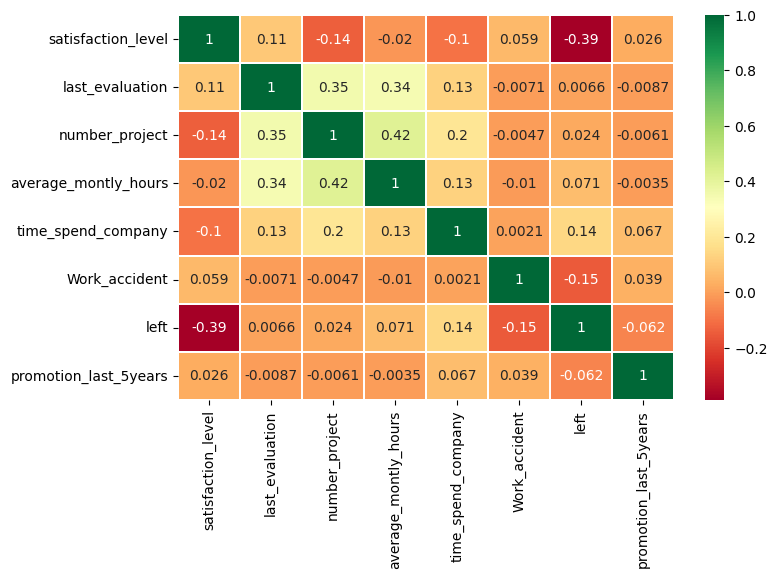

In [18]:
#визуал матрицы корреляции
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

'''
Две самые скоррелированные переменные - number project +average monthly hours

Две наименее скоррелированные переменные work_accident+time spend company
'''

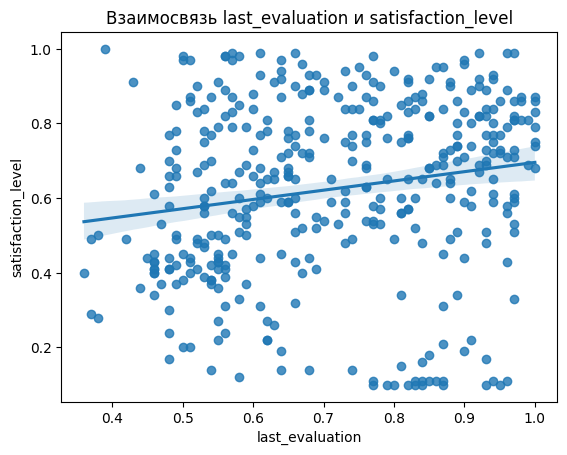

In [19]:
plt.title('Взаимосвязь last_evaluation и satisfaction_level')
sns.regplot(x= 'last_evaluation', y='satisfaction_level',data=df.sample(400), fit_reg=True)

plt.show()

4) Рассчитайте сколько сотрудников работает в каждом департаменте

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
# фильтруем таблицу, удаляя всех уволившихся, т.к. считаю, что корректнее проводить анализ среди сотрудников компании
df_woleft = df[df['left'] == 0]

# пересчитываем оставшихся
df_woleft['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

5.Показать распределение сотрудников по зарплатам.

In [26]:
df_woleft['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

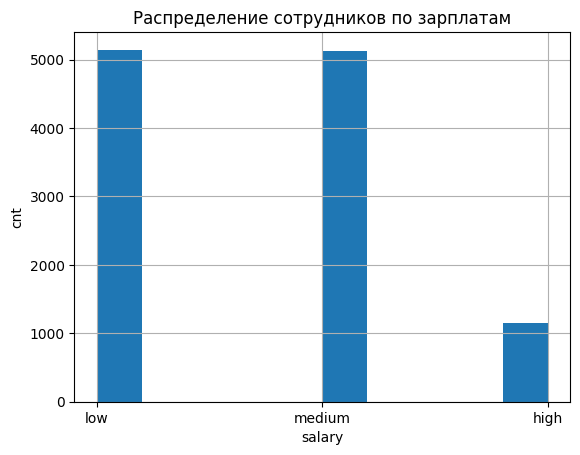

In [28]:
n, bins, patches = plt.hist(df_woleft['salary'], 10)

plt.xlabel('salary')
plt.ylabel('cnt')
plt.title('Pаспределение сотрудников по зарплатам')
plt.grid(True)
plt.show()

#Видим, что низкую и среднюю зарплату получают большинство сотрудников компании

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [40]:
df_woleft.groupby(['salary', 'department'])['number_project'].count().reset_index()


,salary,department,number_project
0,high,IT,79
1,high,RandD,47
2,high,accounting,69
3,high,hr,39
4,high,management,224
5,high,marketing,71
6,high,product_mng,62
7,high,sales,255
8,high,support,133
9,high,technical,176


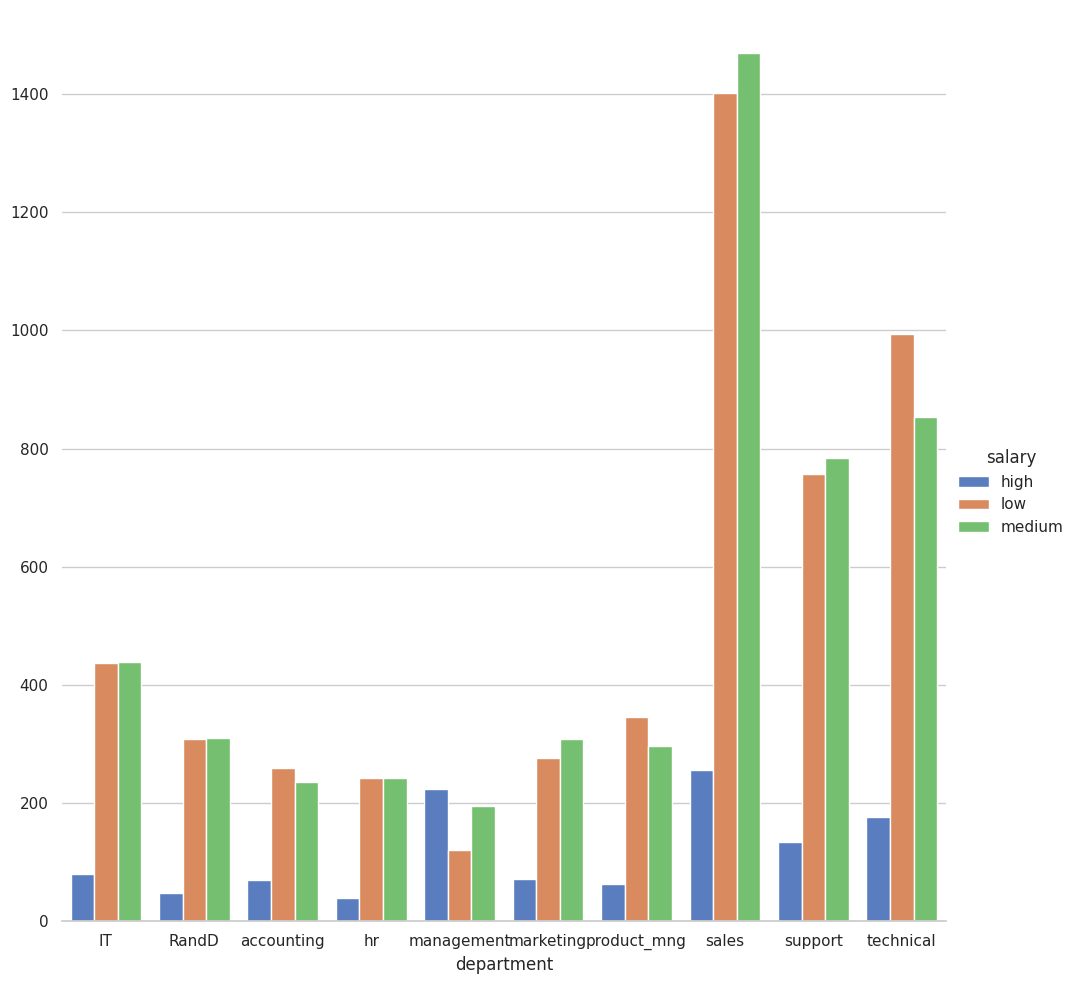

In [42]:
tmp = df_woleft.groupby(['salary', 'department']).count().reset_index()

sns.set(style="whitegrid")

g = sns.catplot(x="department", y = 'satisfaction_level', hue="salary", data=tmp,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("")

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [57]:
data_1 = df.loc[df['salary']=='high']['average_montly_hours'].values
data_2 = df.loc[df['salary']=='low']['average_montly_hours'].values

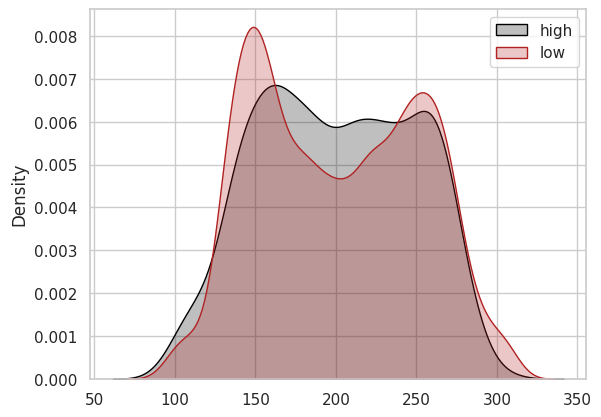

In [58]:
sns.kdeplot(data_1, label="high", fill = True, color = '#000000')
sns.kdeplot(data_2, label="low", fill = True, color = '#B22222')
plt.legend()
plt.show()

In [59]:
stat, p = st.shapiro(data_1)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.971, p = 0.00000
Вероятно не нормальное распределение


In [60]:
stat, p = st.shapiro(data_2)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.960, p = 0.00000
Вероятно не нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
stat, p = st.mannwhitneyu(data_1, data_2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [ ]:
#Вывод. Тест не показал наличие статистически значимой разницы между уровнем заработной платы и временем работы.
#т.е. гипотеза не подтвердилась

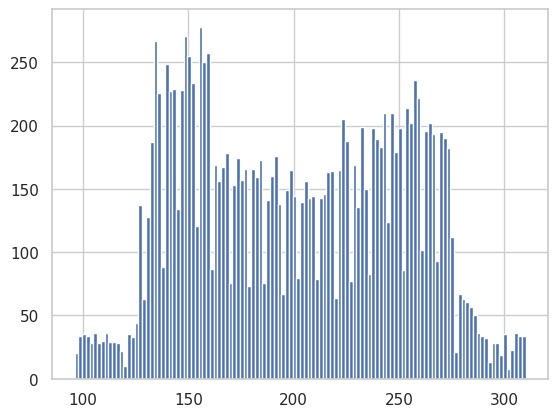

In [70]:
plt.hist(df['average_montly_hours'], bins=120);

Вывод. Тест не показал наличие статистически значимой разницы в расходах - при текущих данных мы не можем утверждать, что тестовая компания будет обходится нам дороже.

8) Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
a)Доля сотрудников с повышением за последние 5 лет
b) Средняя степень удовлетворенности
c) Среднее количество проектов

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [122]:
#8a)
df.groupby(['left','promotion_last_5years']).size().reset_index()

,left,promotion_last_5years,0
0,0,0,11128
1,0,1,300
2,1,0,3552
3,1,1,19


In [123]:
df.groupby('left')['promotion_last_5years'].mean() *100

left
0    2.625131
1    0.532064
Name: promotion_last_5years, dtype: float64

In [85]:
#8b)
df.groupby('left')["satisfaction_level"].agg(['mean'])

,mean
left,
0,0.666810
1,0.440098


In [86]:
#8c
df.groupby('left')["number_project"].agg(['mean'])

,mean
left,
0,3.786664
1,3.855503


9)Логистическая ргрессия для целевого значения от осстальных признаков
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [87]:
X = df.drop(['left','department','salary','count'], axis=1)
y = df.left

In [92]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [94]:
y_test.size, y_test.sum()

(3750, 897)

In [95]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2853
           1       0.49      0.24      0.32       897

    accuracy                           0.76      3750
   macro avg       0.64      0.58      0.59      3750
weighted avg       0.72      0.76      0.73      3750

